# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Нам требуется изучить как влияет стоимость квартиры от различных показателей: общей площади, числа комнат, удаленности от центра, этажа и т.д.

Анализ будет проводиться в несколько этапов:



* [Шаг 1. Общая информация](#cell2)
* [Шаг 2. Предобработка данных](#cell3)
* [Шаг 3. Добавление новых данных](#cell4)
* [Шаг 4. Анализ данных](#cell5)
* [Шаг 5. Общий вывод](#cell6)

<a id="cell2"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #загружаем файл с данными и используем разделитель столбцов \t
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод


Мы загрузили файл с данными о продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах.

Всего в таблице загружено 22 столбца, содержащие следующую информацию:

<li> <i>airports_nearest</i> - расстояние до ближайшего аэропорта в метрах </li>
<li> <i>balcony</i> - число балконов </li>
<li> <i>ceiling_height</i> - высота потолков в метрах </li>
<li> <i>cityCenters_nearest</i> - расстояние до ближайшего центра города в метрах </li>
<li> <i>days_exposition</i> - сколько дней было размещено объявление (от публикации до снятия) </li>
<li> <i>first_day_exposition</i> - дата публикации </li>
<li> <i>floor</i> - этаж </li>
<li> <i>floors_total</i> - всего этажей в доме </li>
<li> <i>is_apartment</i> - апартаменты </li>
<li> <i>kitchen_area</i> - площадь кухни в квадратных метрах </li>
<li> <i>last_price</i> - цена на момент снятия публикации </li>
<li> <i>living_area</i> - жилая площадь в квадратных метрах </li>
<li> <i>locality_name</i> - название населенного пункта </li>
<li> <i>open_plan</i> - свободная планировка </li>
<li> <i>parks_around3000</i> - число парков в радиусе 3 км </li>
<li> <i>parks_nearest</i> - расстояние до ближайшего парка в метрах </li>
<li> <i>ponds_around3000</i> - число водоемов в радиусе 3 км </li>
<li> <i>ponds_nearest</i> - расстояние до ближайшего водоема в метрах </li>
<li> <i>rooms</i> - число комнат </li>
<li> <i>studio</i> - квартира-студия </li>
<li> <i>total_area</i> - площадь квартиры в квадратных метрах </li>
<li> <i>total_images</i> - число фотографий квартиры в объявлении </li>

Мы видим много пропущенных значений в таблице и столбцы, в которых следует изменить тип данных. Например, данные о количестве балконов должны иметь целочисленный тип.


<a id="cell3"></a>
### Шаг 2. Предобработка данных


Сперва изучим пропущенные значения и попробуем определить можем ли мы их заменить.


In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Довольно много данных нам неизвестно.

Первое, что можно предположить, это в случае, если в столбце о количестве балконов есть пропуски, то, скорее всего, балконов нет. Значит эти пропущенные значения мы можем заменить на 0.

Далее, если отсутствуют значения в столбце <i>is_apartment</i>, то это может означать, что квартира не является апартаментами, то есть нежилым помещением. Такие пропуски лучше заменить на False.

Пропуски в столбце <i>days_exposition</i> могут означать, что квартира еще не продана, т.е. объявление о продаже еще не снято. В этом случае можем также оставить пустое значение ячейки.

В случае, если не указано число парков и водоемов в радиусе 3000 м, вероятно, поблизости нет парков и водоемов. Значит эти столбцы можно заполнить нулями.

Данные по расстоянию до аэропорта и центра города попробуем заменить медианными значениями по населенным пунктам.

Пропуски в столбце по высоте потолков заменим стандартным 2.5 м. Это минимальное значение для жилых помещений.


In [5]:
airport = data.groupby(by='locality_name')['airports_nearest'].median() #создаем таблицу с медианными значениями
airport = airport.reset_index().rename(columns={airport.index.name: 'locality_name'})
data['airports_nearest'] = data['airports_nearest'].fillna(value=-1)

In [6]:
def airport_near(row): #функция заменяет неизвестные расстояния до аэропорта медианными
    locality = row['locality_name']
    if row['airports_nearest']==-1:
        for i in range(len(airport)):
            if airport['locality_name'][i] == locality:
                return airport['airports_nearest'][i]
            else:
                return row['airports_nearest']
    else:
        return row['airports_nearest']
data['airports_nearest'] = data.apply(airport_near, axis=1)

In [7]:
city = data.groupby(by='locality_name')['cityCenters_nearest'].median()
city = city.reset_index().rename(columns={city.index.name: 'locality_name'})
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=-1)

In [8]:
def center_near(row): #функция заменяет неизвестные расстояния до центра медианными
    locality = row['locality_name']
    if row['cityCenters_nearest']==-1:
        for i in range(len(city)):
            if city['locality_name'][i] == locality:
                return city['cityCenters_nearest'][i]
            else:
                return row['cityCenters_nearest']
    else:
        return row['cityCenters_nearest']
data['cityCenters_nearest'] = data.apply(center_near, axis=1)

In [9]:
data['balcony'] = data['balcony'].fillna(value=0) #заполняем пропуски в количестве балконов, парков и прочего
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['floors_total'] = data['floors_total'].fillna(value=0)
data['days_exposition'] = data['days_exposition'].fillna(value='')
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ceiling_height'] = data['ceiling_height'].fillna(value=2.5)

Вычислим столбец с отдаленностью от центра в километрах.

In [10]:
data['center'] = data['cityCenters_nearest'] / 1000
data['center'] = data['center'].fillna(value=0)
data['center'] = data['center'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,,16
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,18
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,13
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,6
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,8



Парки в городах расположены более ли менее с равной плотностью, примерно в каждом районе. Расстояние до ближайшего парка оценим через отдаленность от центра города.


In [11]:
park = data.groupby(by='center')['parks_nearest'].median()
park = park.reset_index().rename(columns={park.index.name: 'center'})
data['parks_nearest'] = data['parks_nearest'].fillna(value=-1)

In [12]:
def park_near(row):
    local = row['center']
    if row['parks_nearest']==-1:
        for i in range(len(park)):
            if park['center'][i] == local:
                return park['parks_nearest'][i]
            else:
                return row['parks_nearest']
    else:
        return row['parks_nearest']
data['parks_nearest'] = data.apply(park_near, axis=1)

In [13]:
pond = data.groupby(by='center')['ponds_nearest'].median()
pond = pond.reset_index().rename(columns={pond.index.name: 'center'})
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=-1)

In [14]:
def pond_near(row):
    local = row['center']
    if row['ponds_nearest']==-1:
        for i in range(len(pond)):
            if pond['center'][i] == local:
                return pond['ponds_nearest'][i]
            else:
                return row['ponds_nearest']
    else:
        return row['ponds_nearest']
data['ponds_nearest'] = data.apply(pond_near, axis=1)


Приведем столбцы к нужным типам данных:

* столбец <i>first_day_exposition</i> должен быть типа "дата"
* столбец <i>floors_total</i> имеет целочисленный тип
* столбец <i>is_apartment</i> приведем к булеву типу, т.к. он принимает только значения True или False
* столбец <i>balcony</i> должен быть целочисленного типа, т.к. не может быть дробное число балконов
* столбец <i>days_exposition</i> также маловероятно, что имеет тип Float, т.к. содержит данные о количестве дней


In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')

<a id="cell4"></a>
### Шаг 3. Посчитайте и добавьте в таблицу


Добавим в таблицу несколько новых столбцов, которые могут понадобиться для последующего анализа данных:

* цену квадратного метра - <i>price_per_meter</i>;
* день недели, месяц и год публикации объявления - <i>day_of_week</i>, <i>month</i> и <i>year</i> соответственно;
* этаж квартиры, имеющий категориальный тип - <i>floor_category</i>;
* соотношение жилой и общей площади - <i>living_ratio</i>;
* отношение площади кухни к общей - <i>kitchen_ratio</i>.


In [16]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Столбец с категорией этажа будет принимать следующие значения: "первый", "последний", "другой".

In [19]:
data['floor_category'] = 'другой'
data.loc[data['floor']==1, 'floor_category'] = 'первый'
data.loc[data['floor']==data['floors_total'], 'floor_category'] = 'последний'

Рассчитаем несколько второстепенных параметров - соотношение жилой и общей площади, отношение площади кухни к общей.

In [20]:
data['living_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center,price_per_meter,day_of_week,month,year,floor_category,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,16,120370.370370,Thursday,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,...,-1.0,81.0,18,82920.792079,Tuesday,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,574.0,558.0,13,92785.714286,Thursday,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,NaN,9,False,...,234.0,424.0,6,408176.100629,Friday,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,8,100000.000000,Tuesday,6,2018,другой,0.320000,0.410000


<a id="cell5"></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:


Построим гистограммы параметров: площади, цены, числа комнат, высоты потолка.


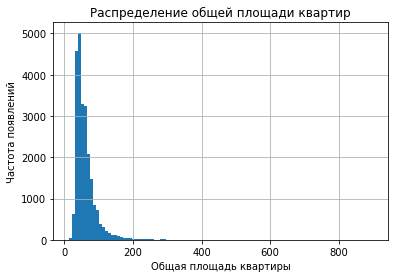

In [30]:
data.hist(column='total_area', bins=100, sharex=True, sharey=True);
plt.title('Распределение общей площади квартир');
plt.xlabel("Общая площадь квартиры");
plt.ylabel("Частота появлений");

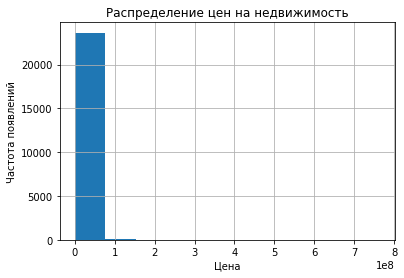

In [31]:
data.hist(column='last_price', sharex=True, sharey=True);
plt.title('Распределение цен на недвижимость');
plt.xlabel("Цена");
plt.ylabel("Частота появлений");

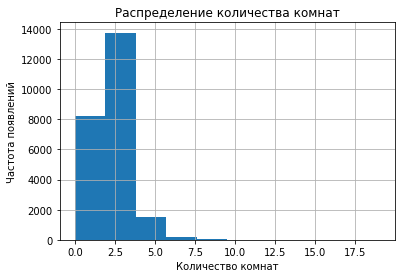

In [32]:
data.hist(column='rooms', sharex=True, sharey=True);
plt.title('Распределение количества комнат');
plt.xlabel("Количество комнат");
plt.ylabel("Частота появлений");

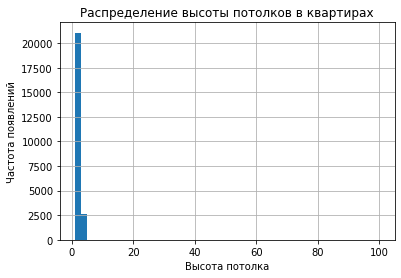

In [33]:
data.hist(column='ceiling_height', bins=50);
plt.title('Распределение высоты потолков в квартирах');
plt.xlabel("Высота потолка");
plt.ylabel("Частота появлений");


Видим, что график распределения имеют распределение Пуассона. При этом видим несколько выбивающихся значений.

Например, есть несколько квартир, имеющих довольно маленькую площадь. По стандартам минимальный размер жилого помещения на одного человека - 33 квадратных метра. Вероятно, квартиры, имеющие площадь меньше допустимого - либо артефакты, либо не являются жилыми помещениями, а значит столбец <i>is_apartment</i> должен принимать значение True. Квартиры, с площадью 900 квадратных метров - это также редкие значения.

Цены, по которым продавали недвижимость имеют очень большой разброс: от нескольких тысяч до миллионов. Гистограмму, имеющую такой разброс значений очень сложно оценить.

Количество комнат изменяется от нуля (очевидно, в студиях или при свободной планировке) до 19 (скорее всего, в частных домах). Вряд ли эти значения можно назвать ошибочными. Они возможны, хотя и затрудняют анализ даных.

А вот данные о высоте потолков явно ошибочны: они изменяются от одного метра до 100. Трудно сказать есть ли какие-то стандарты строительства для частных домов или нежилых помещений, но вообще-то минимальная высота потолка принята 2.5 метра. В новостройках она еще выше - примерно 2.7 м. Но и стометровый потолок точно делать никто не будет.

При анализе данных все эти значения должны быть отсечены.


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

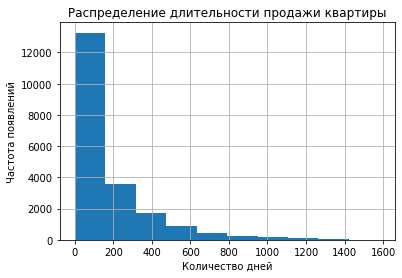

In [35]:
data.hist(column='days_exposition');
plt.title('Распределение длительности продажи квартиры');
plt.xlabel("Количество дней");
plt.ylabel("Частота появлений");
data['days_exposition'].describe()

Время продажи квартиры также сильно колеблется - от одного дня до четырех с половиной лет. Среднее значение времени продажи квартиры - полгода, при этом медиана равна всего 95 дней.

Нормальным временем продажи считается число до 515 дней. Все, что после этого - выбросы.


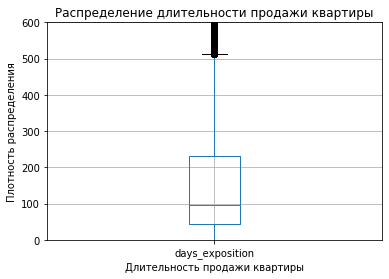

In [42]:
#import matplotlib.pyplot as plt
plt.ylim(0, 600)
data.boxplot(column='days_exposition');
plt.title('Распределение длительности продажи квартиры');
plt.xlabel("Длительность продажи квартиры");
plt.ylabel("Плотность распределения");

In [36]:
good_data = data.query('last_price<13000000') #создадим таблицу, исключающую редкие значения
good_data = good_data.query('total_area<115')
good_data = good_data.query('rooms<6')

Изучим зависимость цены квартиры от общей площади, количества комнат, удаленности от центра.

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.710669,0.441223,0.094051
total_area,0.710669,1.000000,0.802195,-0.018124
rooms,0.441223,0.802195,1.000000,-0.011665
cityCenters_nearest,0.094051,-0.018124,-0.011665,1.000000


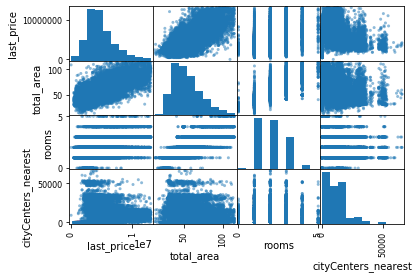

In [37]:
data_scatter = good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(data_scatter)
data_scatter.corr()


Зависимость цены квартиры от площади видна невооруженным глазом. Есть небольшая корреляция с количеством комнат, но она, вероятнее всего происходит от зависимости площади квартиры от количества комнат. Зависимости цены от отдаленности от центра не наблюдается никакой, что весьма странно.


Посмотрим, влияет ли дата публикации объявления о продаже на стоимость квартиры.

,last_price,month,year
last_price,1.000000,0.006781,-0.001366
month,0.006781,1.000000,-0.267011
year,-0.001366,-0.267011,1.000000


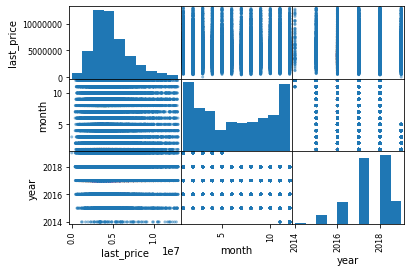

In [38]:
data_scatter = good_data[['last_price', 'month', 'year']]
pd.plotting.scatter_matrix(data_scatter)
data_scatter.corr()


Графики выше демонстрируют, что цена квартиры никак не зависела от даты размещения объявления.
Совершенно разные стоимости независимо от года и месяца.


In [39]:
good_data.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,5.116716e+06
первый,4.148570e+06
последний,4.507412e+06


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


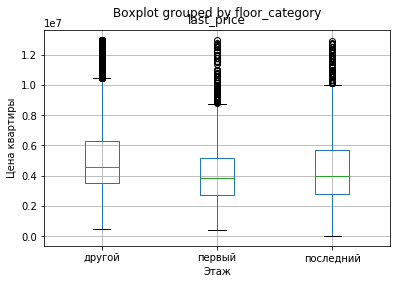

In [51]:
good_data.boxplot(column='last_price', by='floor_category');
plt.xlabel("Этаж");
plt.ylabel("Цена квартиры");

Видим, что, хоть и среднее значение цены примерно на одном уровне, но в целом мы видим, что квартиры на первом этаже примерно на 200 тысяч дешевле, чем квартиры, расположенные на других этажах. Очевидно, квартиры на первом этаже считаются наиболее неудобными в плане шума, уровня безопасности, загазованности воздуха.

Квартиры на последнем этаже также чуть менее популярны. Скорее всего, это связано с возможностью затопления квартиры, если потечет крыша. Также крыша может сильно нагреваться на солнце, тогда в квартире становится очень душно.

In [52]:
good_data.pivot_table(index='day_of_week', values='last_price')

,last_price
day_of_week,
Friday,4.880641e+06
Monday,4.903225e+06
Saturday,4.781034e+06
Sunday,4.829780e+06
Thursday,4.923191e+06
Tuesday,4.980405e+06
Wednesday,4.948623e+06



Также цена не зависит ни от дня недели, когда было опубликовано объявление, ни от категории этажа, где размещена квартира.

Пока что одна безусловная зависимость: цена от площади квартиры.


Выделим населенные пункты с наибольшим числом объявлений о продаже квартир.


In [53]:
good_data.groupby(by='locality_name')['locality_name'].value_counts().sort_values(ascending=False).head(10)

locality_name      locality_name    
Санкт-Петербург    Санкт-Петербург      13901
посёлок Мурино     посёлок Мурино         522
посёлок Шушары     посёлок Шушары         437
Всеволожск         Всеволожск             394
Пушкин             Пушкин                 338
Колпино            Колпино                336
посёлок Парголово  посёлок Парголово      326
Гатчина            Гатчина                303
деревня Кудрово    деревня Кудрово        298
Выборг             Выборг                 228
Name: locality_name, dtype: int64

In [54]:
top_ten = good_data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
top_ten = top_ten.where(top_ten['last_price']>=228).dropna()
top_data = good_data.query('locality_name in @top_ten.index')
top_data.groupby(by='locality_name')['price_per_meter'].min().sort_values()

locality_name
Санкт-Петербург        111.834862
Гатчина              10897.435897
Выборг               18750.000000
Всеволожск           31400.000000
посёлок Шушары       47700.416089
Колпино              47957.371226
посёлок Парголово    48405.466970
посёлок Мурино       50000.000000
деревня Кудрово      54160.346696
Пушкин               59836.065574
Name: price_per_meter, dtype: float64

In [55]:
top_data.groupby(by='locality_name')['price_per_meter'].max().sort_values(ascending=False)

locality_name
Санкт-Петербург      387096.774194
Пушкин               166666.666667
посёлок Шушары       147826.086957
деревня Кудрово      142857.142857
посёлок Мурино       138580.246914
посёлок Парголово    138522.427441
Всеволожск           136423.841060
Гатчина              130853.994490
Колпино              125000.000000
Выборг                94805.194805
Name: price_per_meter, dtype: float64


Больше всего объявлений о продаже недвижимости в Санкт-Петербурге. Количество объявлений в остальных населенных пунктах отличасются от питерских больше, чем в три раза. При этом в Санкт-Петербурге и самая низкая, и самая высокая стоимость квадратного метра. И это не удивительно: огромный город - огромное разнообразие квартир на любой вкус и возможности.


Изучим подробнее цены на квартиры в Санкт-Петербурге. Прежде всего, определим какая область города входит в центр.

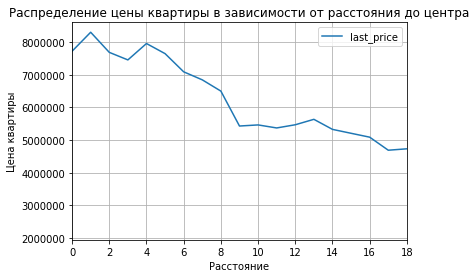

In [57]:
data_spb = good_data.query('locality_name =="Санкт-Петербург"')
data_spb_table = data_spb.pivot_table(index='center', values='last_price')
data_spb_table.plot(grid=True, xlim=(0, 18));
plt.title('Распределение цены квартиры в зависимости от расстояния до центра')
plt.xlabel("Расстояние");
plt.ylabel("Цена квартиры");

Видим, что при удаленности больше 8 км цена на квартиры резко упала. Значит можем сделать вывод, что центр города - в пределах 8 км.

In [58]:
data_spb_center = data_spb.query('center<8') #выделим отдельную таблицу - центр Санкт-Петербурга
data_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center,price_per_meter,month,year,living_ratio,kitchen_ratio
count,2531.000000,2.531000e+03,2531.000000,2531.000000,2531.000000,2531.000000,2350.000000,2531.000000,2297.000000,2531.000000,...,2531.000000,2531.000000,2531.000000,2200.000000,2531.000000,2531.000000,2531.000000,2531.000000,2350.000000,2297.000000
mean,9.758593,7.557511e+06,65.214714,2.285263,2.839798,7.229158,38.343757,4.112604,11.315855,0.290399,...,305.978269,1.224812,340.944686,220.312273,4.259581,120027.190634,6.484394,2017.241011,0.576981,0.182622
std,5.633732,2.377049e+06,21.308654,0.962958,0.837132,4.103363,15.959491,2.982883,4.875377,0.683966,...,340.959422,1.071935,309.993357,255.389760,1.805619,30239.714215,3.439835,1.089109,0.112221,0.080076
min,0.000000,1.600000e+06,12.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000,...,-1.000000,0.000000,-1.000000,3.000000,0.000000,17391.304348,1.000000,2014.000000,0.038462,0.054348
25%,6.000000,5.800000e+06,47.950000,2.000000,2.500000,5.000000,26.500000,2.000000,8.000000,0.000000,...,-1.000000,0.000000,-1.000000,51.000000,3.000000,97995.449307,3.000000,2017.000000,0.511508,0.126582
50%,9.000000,7.350000e+06,64.000000,2.000000,2.700000,6.000000,36.300000,3.000000,10.000000,0.000000,...,273.000000,1.000000,292.000000,118.000000,4.000000,115384.615385,6.000000,2017.000000,0.591993,0.160000
75%,14.000000,9.200000e+06,80.550000,3.000000,3.000000,9.000000,49.500000,5.000000,13.000000,0.000000,...,505.000000,2.000000,579.000000,294.000000,6.000000,137586.653212,10.000000,2018.000000,0.656331,0.217105
max,32.000000,1.299900e+07,114.800000,5.000000,32.000000,27.000000,90.200000,24.000000,48.300000,5.000000,...,2295.000000,3.000000,1199.000000,1497.000000,7.000000,387096.774194,12.000000,2019.000000,0.972222,0.625000


Разделяя таким образом объявления о продаже квартир, видим, что стандартное отклонение не такое уж большое. В центре примерно одинаковая высота потолков, не очень большая площадь, в среднем это квартиры с двумя комнатами. Хотя цена все же может значительно отличаться.

,rooms,last_price,floor,cityCenters_nearest,total_area
rooms,1.000000,0.449972,-0.138197,-0.143900,0.789884
last_price,0.449972,1.000000,0.134347,-0.124138,0.707179
floor,-0.138197,0.134347,1.000000,0.204740,-0.042247
cityCenters_nearest,-0.143900,-0.124138,0.204740,1.000000,-0.160325
total_area,0.789884,0.707179,-0.042247,-0.160325,1.000000


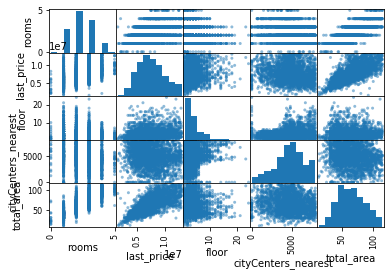

In [66]:
data_analysis = data_spb_center[['rooms', 'last_price', 'floor', 'cityCenters_nearest', 'total_area']]
pd.plotting.scatter_matrix(data_analysis)
data_analysis.corr()


Во графиках второй строки сверху мы можем проследить зависимости слева направо:

* Цены от количества комнат. Не слишком наглядно, но все же видим, что в целом, чем больше комнат, тем выше цена.
* Гистограмма распределения цен по центру Санкт-Петербурга.
* Зависимость центы от этажа. Зависимости нет, хотя полученная визуализация и напоминает немного экспоненциальное распределение со "скошенным" окончанием - чем выше этаж, тем выше стоимость, за исключением последнего этажа, где цена падает.
* Цены от расстояния до центра. Данная зависимость не прослеживается.
* Цены от общей площади. Очень четкая линейная зависимость - чем больше площадь, тем выше цена.

Полученные графики демонстрируют четкую зависимость цены от общей площади квартиры. Сравнивая данные распределения по центру Санкт-Петербурга с первоначальными, построенными по всем населенным пунктам, мы можем наблюдать более четко прослеживающуюся зависимость. Сужение первоначальной информации по каким-либо признакам позволяет янее отобразить факторы, влияющие на цену.


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


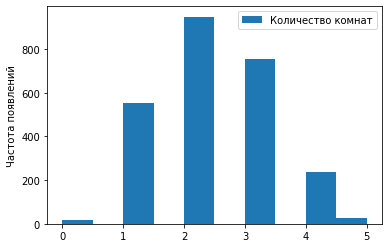

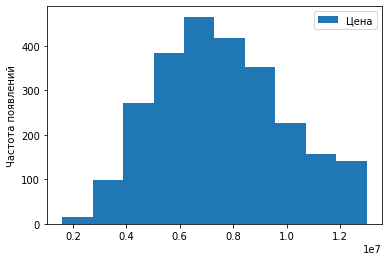

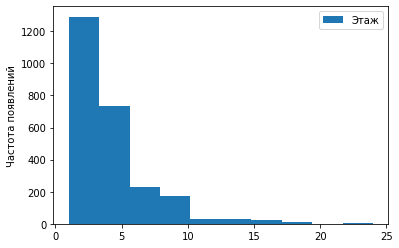

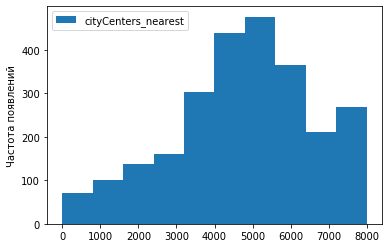

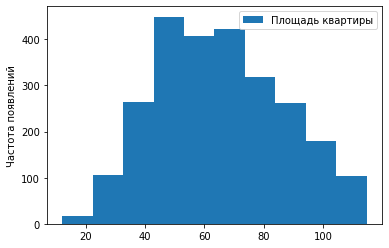

In [68]:
data_analysis.rename(columns={'rooms': 'Количество комнат', 'last_price': 'Цена', 'floor': 'Этаж', 'cityCenters_nearest': 'Расстояние до центра', 'total_area': 'Площадь квартиры'}, inplace=True)
for column in data_analysis.columns:
    data_analysis.plot(y=column, kind='hist')
    plt.ylabel('Частота появлений')

Распределение таких параметров, как количество комнат, цена, этаж, расстояние до центра и общая площадь недвижимости, также отличается по центру Санкт-Петербурга от подобного распределения по всем населенным пунктам.

Удаляя артефакты и выбросы по данным параметрам, а также анализируя более "узкое" направление - только центр Санкт-Петербурга - мы видим наиболее грамотное распределение.

В центре почти не встречаются высокие здания с большим количеством комнат. В основном, это пятиэтажки с двумя-тремя комнатами и площадью 50-70 кв.метров.

Квартиры продаются в основном не в самом центре, а в 3 км от него. Вероятно, в центре в целом меньше жилых помещений. В основном здания выкуплены под офисы и коммерческие нужды.


<a id="cell6"></a>
### Шаг 5. Общий вывод


В процессе исследования была проведена большая работа над полученными первоначальными данными.

Данные по продажам были двух типов: полученные от пользователей и рассчитанные автоматически на основе картографических данных.

Анализируя таблицу параметров, было выявлено огромное количество пропущенных значений. Большинство этих значений были из тех, что должны были рассчитываться автоматически - расстояние до центра, аэропорта, ближайшего парка и водоема. Возможно, следует пересмотреть метод расчета подобных параметров.

В данных, заполненных пользователями, также встречались неточности и опечатки. Так, например, высота потолков в жилых помещениях, не должна быть меньше 2.5 метров. Однако встречались значения в 1 метр и в 100 метров, что тоже крайне маловероятно.

Устранив пропущенные значения, артефакты и выбросы в исходных данных, можно уже приступать непосредственно к анализу.

В процессе анализа были изучены факторы, влияющие на стоимость недвижимости для всех населенных пунктов и отдельно для центра Санкт-Петербурга. Получена основная зависимость - чем выше площадь продаваемой недвижимости, тем выше ее цена. Второстепенные параметры - это количество комнат и этаж, на котором располагается квартира. На первых и последних этажах цена ниже. Люди предпочитают не покупать квартиры на первом этаже, хотя в отдельных случаях это может быть плюсом: для пожилых людей, когда им не приходится спускаться по лестницам или молодым семьям с детьми (что как раз подходит для центра города, так как в старых зданиях нет лифтов).

Для выявления более четких зависимостей, полезно сужение данных до какой-либо одной области, как, например, в данном случае - центра Санкт-Петербурга. Анализ этих значений более точен, зависимости прослеживаются более явно. Основываясь на цене, мы определили радиус, в котором квартиры можно считать "квартирами в центре" - это 8 км. Внутри этого радиуса квартиры намного дороже остальных.

Очень мало квартир непосредственно в самом центре Санкт-Петербурга. Скорее всего, здании в нем выкуплены для нежилых помещений - офисов и прочего.

Так, полученные зависимости помогут в дальнейшем распознавать мошенническую деятельность - встреченные аномалии сразу должны броситься в глаза.
